In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests
import io

# Check matplotlib version
print('Matplotlib version:', mpl.__version__)

# Display plots inline
%matplotlib inline

# Read CSV from URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
response = requests.get(url)
data = io.BytesIO(response.content)
df_raw = pd.read_csv(data)

# Show that the data has been loaded
print("Data read into a pandas dataframe!")
df_raw.head()


Matplotlib version: 3.8.4
Data read into a pandas dataframe!


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [7]:
# Strip whitespaces from column names
df_raw.columns = df_raw.columns.str.strip()

# Set 'Country' as the index
df_can = df_raw.set_index('Country')

# Keep only year columns from 1980 to 2013
years = list(map(str, range(1980, 2014)))
df_can = df_can[years].astype(int)

# Total number of immigrants per year
total_immigrants = df_can.sum(axis=0)


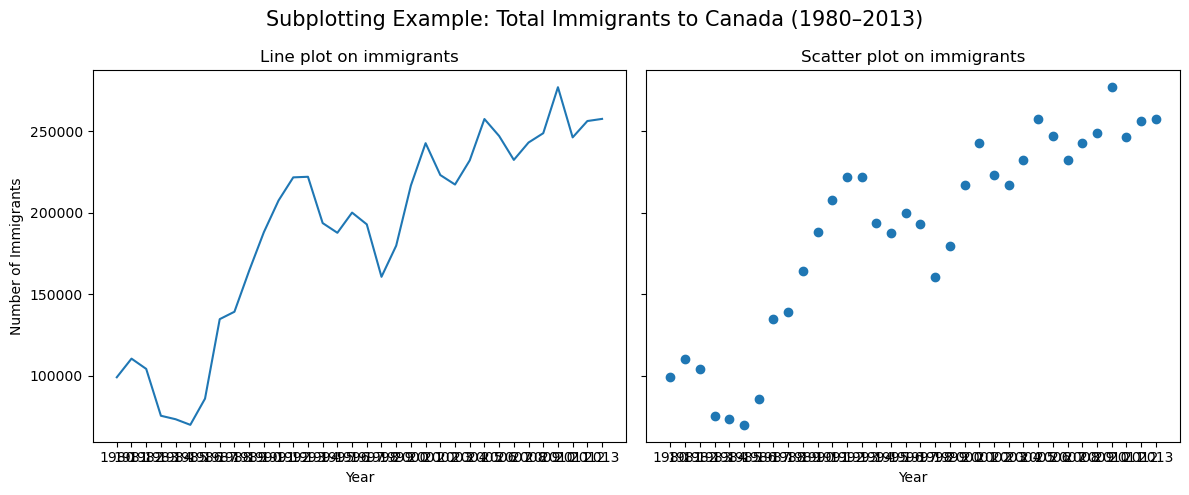

In [8]:
# Create subplots: Line and Scatter
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Line plot
axs[0].plot(total_immigrants)
axs[0].set_title("Line plot on immigrants")
axs[0].set_ylabel("Number of Immigrants")
axs[0].set_xlabel("Year")

# Scatter plot
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")
axs[1].set_xlabel("Year")

# Main title
fig.suptitle('Subplotting Example: Total Immigrants to Canada (1980–2013)', fontsize=15)
fig.tight_layout()
plt.show()


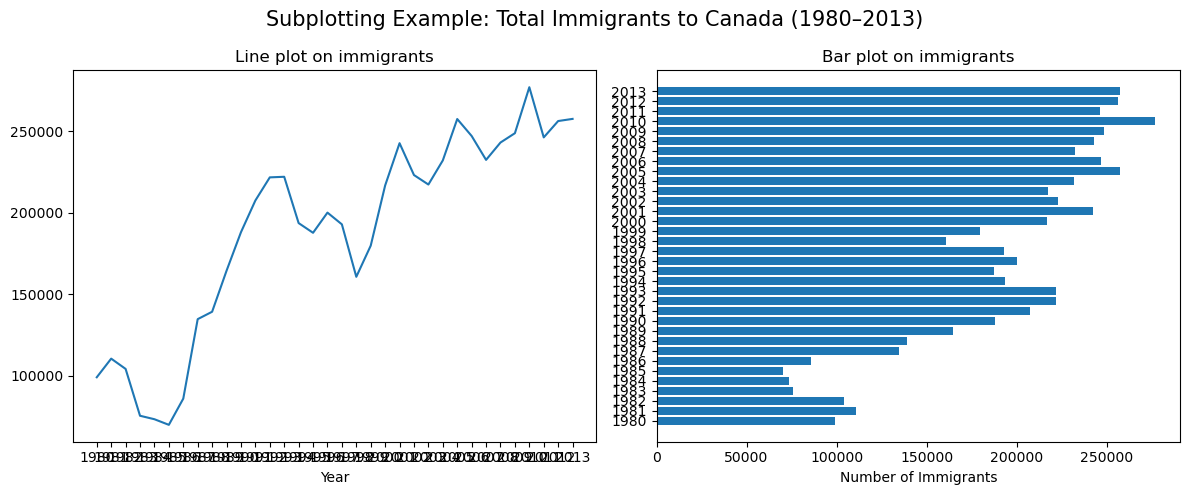

In [9]:
# Create subplots: Line and Horizontal Bar
fig = plt.figure(figsize=(12, 5))

# Line plot (left)
axs1 = fig.add_subplot(1, 2, 1)
axs1.plot(total_immigrants)
axs1.set_title("Line plot on immigrants")
axs1.set_xlabel("Year")

# Horizontal bar plot (right)
axs2 = fig.add_subplot(1, 2, 2)
axs2.barh(total_immigrants.index, total_immigrants)
axs2.set_title("Bar plot on immigrants")
axs2.set_xlabel("Number of Immigrants")

# Main title
fig.suptitle('Subplotting Example: Total Immigrants to Canada (1980–2013)', fontsize=15)
fig.tight_layout()
plt.show()


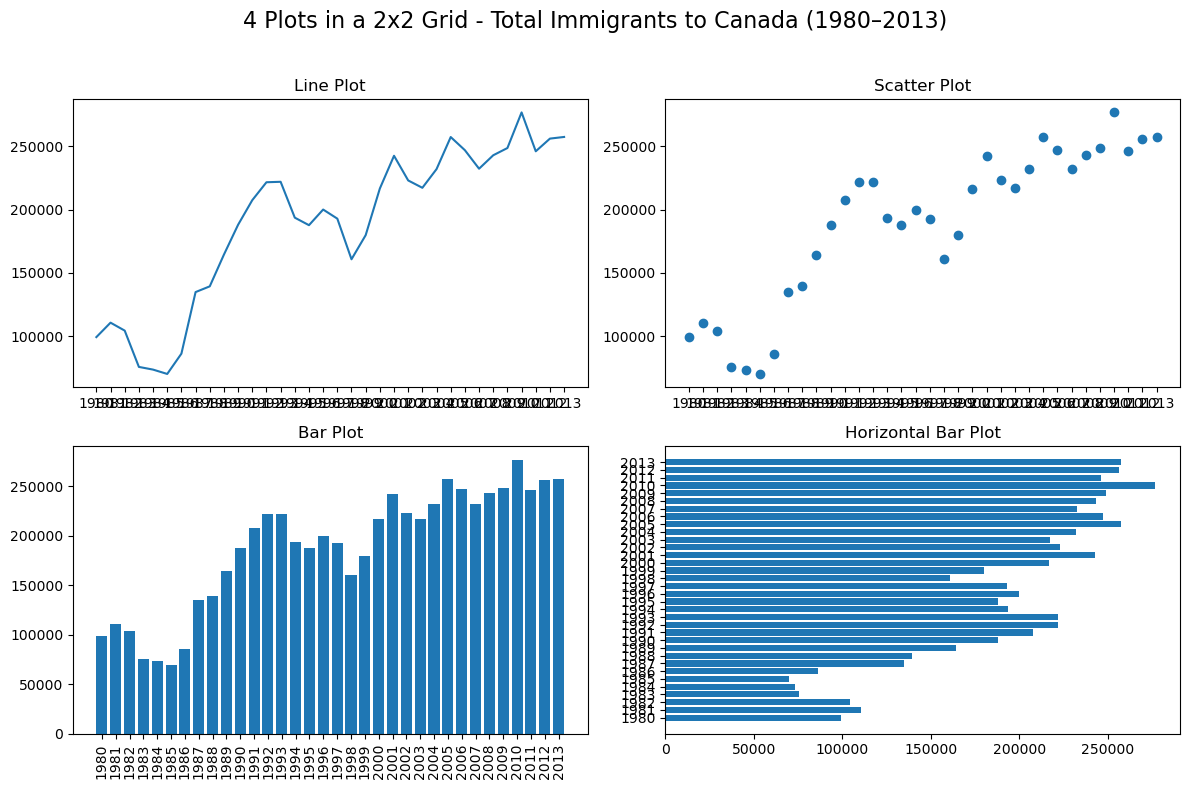

In [10]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Flatten the 2D array of axes for easy indexing
axs = axs.flatten()

# Plot 1: Line plot
axs[0].plot(total_immigrants)
axs[0].set_title("Line Plot")

# Plot 2: Scatter plot
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter Plot")

# Plot 3: Bar plot (vertical)
axs[2].bar(total_immigrants.index, total_immigrants)
axs[2].set_title("Bar Plot")
axs[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 4: Horizontal bar plot
axs[3].barh(total_immigrants.index, total_immigrants)
axs[3].set_title("Horizontal Bar Plot")

# Add a common title
fig.suptitle("4 Plots in a 2x2 Grid - Total Immigrants to Canada (1980–2013)", fontsize=16)

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle

# Show the plots
plt.show()


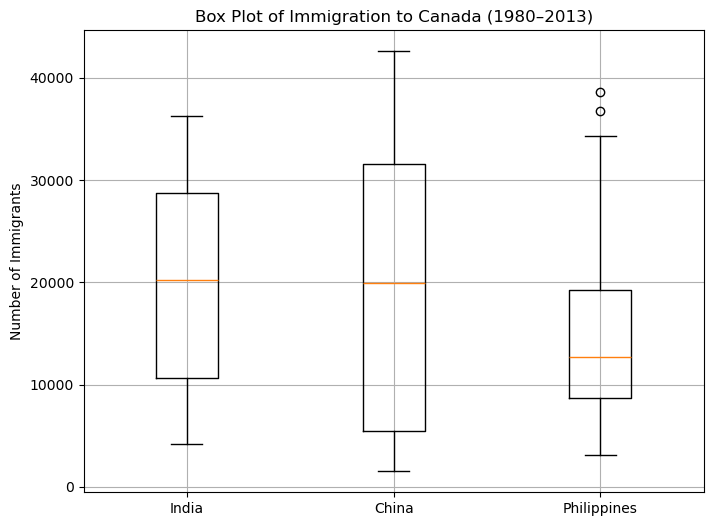

In [12]:
#Boxplot
# Clean and prepare data
df_raw.columns = df_raw.columns.str.strip()
df_can = df_raw.set_index('Country')
years = list(map(str, range(1980, 2014)))
df_can = df_can[years].astype(int)

# Select specific countries for box plot
countries = ['India', 'China', 'Philippines']
data_to_plot = df_can.loc[countries].T  # Transpose for boxplot (years as rows)

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot([data_to_plot[country] for country in countries], labels=countries)
plt.title('Box Plot of Immigration to Canada (1980–2013)')
plt.ylabel('Number of Immigrants')
plt.grid(True)
plt.show()